In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
%matplotlib inline

df = pd.read_csv('used_cars.csv')

In [84]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Clean
1. Mileage is in text
2. So many engine types
3. Accident to be a yes or no that shows if the car has been damaged
4. Look at clean_title
5. Price is text
6. Fuel type electric is missing. Remove empty fuel types

In [85]:
df['milage'] = df['milage'].apply(lambda x: x.replace(' mi.','').replace(',','')).astype('int')
df['milage']

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int32

In [86]:
df['engine']
# HP, Engine Size, V6 

0       300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                    3.8L V6 24V GDI DOHC
2                                          3.5 Liter DOHC
3       354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                              2.0L I4 16V GDI DOHC Turbo
                              ...                        
4004                     6.0L W12 48V PDI DOHC Twin Turbo
4005        349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4006                                             Electric
4007        450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4008         248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 4009, dtype: object

In [87]:
df['accident'] = np.select(condlist=[df['accident'] == "At least 1 accident or damage reported",df['accident'] == "None reported"],
          choicelist=['Yes','No'], default=df['accident'])
df['accident']

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
4004     No
4005     No
4006     No
4007     No
4008    Yes
Name: accident, Length: 4009, dtype: object

In [88]:
df['clean_title'] = df['clean_title'].fillna('No')
df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [89]:
df['price'] = df['price'].apply(lambda x: x.replace(',','').replace("$","")).astype('int64')
df['price']

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

<Axes: xlabel='clean_title', ylabel='price'>

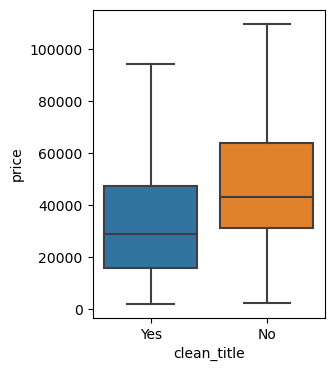

In [90]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df,x='clean_title',y='price',showfliers=False)

In [91]:
# Drop fuel types that are unknown or not supported
df = df.drop(df[(df['fuel_type']=='–')|(df['fuel_type']=='not supported')].index)

In [92]:
# Electric fuel type
df.loc[(df['fuel_type'].isna()) & (df['engine'].str.contains('Electric')),'fuel_type'] = 'Electric'
df


brand                            model  model_year  milage  \
0         Ford  Utility Police Interceptor Base        2013   51000   
1      Hyundai                     Palisade SEL        2021   34742   
2        Lexus                    RX 350 RX 350        2022   22372   
3     INFINITI                 Q50 Hybrid Sport        2015   88900   
4         Audi        Q3 45 S line Premium Plus        2021    9835   
...        ...                              ...         ...     ...   
4004   Bentley             Continental GT Speed        2023     714   
4005      Audi             S4 3.0T Premium Plus        2022   10900   
4006   Porsche                           Taycan        2022    2116   
4007      Ford                     F-150 Raptor        2020   33000   
4008       BMW                     X3 xDrive30i        2020   43000   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006       Electric                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

     accident clean_title   price  
0         Yes         Yes   10300  
1         Yes         Yes   38005  
2          No          No   54598  
3          No         Yes   15500  
4          No          No   34999  
...       ...         ...     ...  
4004       No         Yes  349950  
4005       No         Yes   53900  
4006       No          No   90998  
4007       No         Yes   62999  
4008      Yes         Yes   40000  

[3962 rows x 12 columns]

In [93]:
df['ext_col'].replace('–','Unknown',inplace=True)
df['int_col'].replace('–','Unknown',inplace=True)

In [94]:
df['accident'].fillna('Unknown',inplace=True)

In [95]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering

1. Extracting the engine size and horsepower from the engine

In [96]:
import re
def engine_size(x):
    x = x.replace(' Liter','L') # starnadize
    # matches = re.findall(r'\b(.*?L)\b', x)
    matches = re.findall(r'\b\d\.\dL?\b', x)
    if len(matches) == 0:
        return 0
    else:
        return matches[0][:-1]
df['engine_size'] = df['engine'].apply(engine_size).astype('float')
df['engine_size'].value_counts()

engine_size
2.0    525
3.0    469
3.5    353
3.6    241
0.0    196
4.0    188
2.5    177
6.2    174
5.7    130
5.0    113
3.8    105
5.3    105
2.4    101
4.4     95
4.6     72
6.0     68
3.7     62
1.6     59
4.7     55
6.7     52
2.7     47
1.8     47
1.5     39
5.6     37
2.3     35
3.2     31
3.4     30
6.4     30
5.5     29
5.2     29
4.8     28
6.6     27
3.3     26
4.2     26
5.4     25
2.9     17
1.4     16
3.9     15
4.3     15
1.3      8
6.5      7
6.8      7
6.3      6
2.2      5
2.8      5
6.1      4
5.9      4
7.3      4
7.0      3
1.2      3
5.8      3
8.3      3
4.5      2
8.1      2
2.1      2
1.7      1
8.0      1
7.4      1
8.4      1
1.0      1
Name: count, dtype: int64

In [97]:
def horsepower(x):
    matches = re.findall(r'\d+\.\d+H', x)
    if len(matches) == 0:
        return 0
    return matches[0][:-1]

df['engine'].apply(horsepower)

0       300.0
1           0
2           0
3       354.0
4           0
        ...  
4004        0
4005    349.0
4006        0
4007    450.0
4008    248.0
Name: engine, Length: 3962, dtype: object

### Modelling

In [98]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_size'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler


cols = ['brand','model','model_year','milage','fuel_type','engine_size',
        'transmission','ext_col','int_col','accident','clean_title']

X = df[cols]
y = df['price']

In [139]:
# Normalize the milage

normalizer = MinMaxScaler()
X['milage'] = normalizer.fit_transform(X['milage'].to_numpy().reshape(-1, 1))

C:\Users\Najib\AppData\Local\Temp\ipykernel_11048\3029262816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['milage'] = normalizer.fit_transform(X['milage'].to_numpy().reshape(-1, 1))


In [140]:
# Encoding
import category_encoders as ce 
cat_cols = ['brand','model','fuel_type','transmission','ext_col','int_col','accident','clean_title']
enc = ce.OrdinalEncoder(cols=cat_cols,drop_invariant=True)
X = enc.fit_transform(X)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

#### Setting a baseline

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
price_mean = y.mean()
price_mean_pred = [price_mean] * len(X_test)
MAE = mean_absolute_error(y_test,price_mean_pred)
MSE = mean_squared_error(y_test,price_mean_pred)
print(MAE)
print(MSE)

27039.451222908625
2244917673.675744


In [159]:
def modeler(Model,modelname,X,y,params=None):
    '''
    Creates a model and tests in k-fold fashion. For each fold the accuracy is recorded and 
    '''
    accuracy = []
    K = 10
    for fold in range(0, K):

        # Instantiate algorithm
        if params:
            model = Model(**params)
        else:
            model = Model()
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        # Train model
        trained_model = model.fit(X_train, y_train)

        # Generate predictions on test sample
        y_pred = trained_model.predict(X_test)

        # Compute accuracy, using mean absolute error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        accuracy.append(mae)
        print(f"{modelname}: Fold {fold + 1}: MAE = {mae:.3f}")

    print(f"Average MAE for {modelname}: {(sum(accuracy) / len(accuracy)):.2f}")
    return model

In [160]:
from sklearn.linear_model import LinearRegression 

lr = modeler(LinearRegression,'Linear Regression', X,y)

Linear Regression: Fold 1: MAE = 24667.784
Linear Regression: Fold 2: MAE = 24928.944
Linear Regression: Fold 3: MAE = 23993.859
Linear Regression: Fold 4: MAE = 23435.575
Linear Regression: Fold 5: MAE = 25199.507
Linear Regression: Fold 6: MAE = 25373.458
Linear Regression: Fold 7: MAE = 24150.578
Linear Regression: Fold 8: MAE = 25732.500
Linear Regression: Fold 9: MAE = 25628.259
Linear Regression: Fold 10: MAE = 25505.331
Average MAE for Linear Regression: 24861.58


In [161]:
from xgboost import XGBRegressor

xgb = modeler(XGBRegressor,'XGBRegressor',X,y)

XGBRegressor: Fold 1: MAE = 14180.121
XGBRegressor: Fold 2: MAE = 15764.444
XGBRegressor: Fold 3: MAE = 12739.789
XGBRegressor: Fold 4: MAE = 12935.963
XGBRegressor: Fold 5: MAE = 12650.524
XGBRegressor: Fold 6: MAE = 13055.067
XGBRegressor: Fold 7: MAE = 14203.834
XGBRegressor: Fold 8: MAE = 15038.267
XGBRegressor: Fold 9: MAE = 14185.011
XGBRegressor: Fold 10: MAE = 14553.385
Average MAE for XGBRegressor: 13930.64


RandomForestRegressor: Fold 1: MAE = 13249.810
RandomForestRegressor: Fold 2: MAE = 13480.589
RandomForestRegressor: Fold 3: MAE = 18427.622
RandomForestRegressor: Fold 4: MAE = 13940.097
RandomForestRegressor: Fold 5: MAE = 13828.964
RandomForestRegressor: Fold 6: MAE = 15503.379
RandomForestRegressor: Fold 7: MAE = 14948.750
RandomForestRegressor: Fold 8: MAE = 15707.351
RandomForestRegressor: Fold 9: MAE = 15871.994
RandomForestRegressor: Fold 10: MAE = 16344.150
Average MAE for RandomForestRegressor: 15130.27


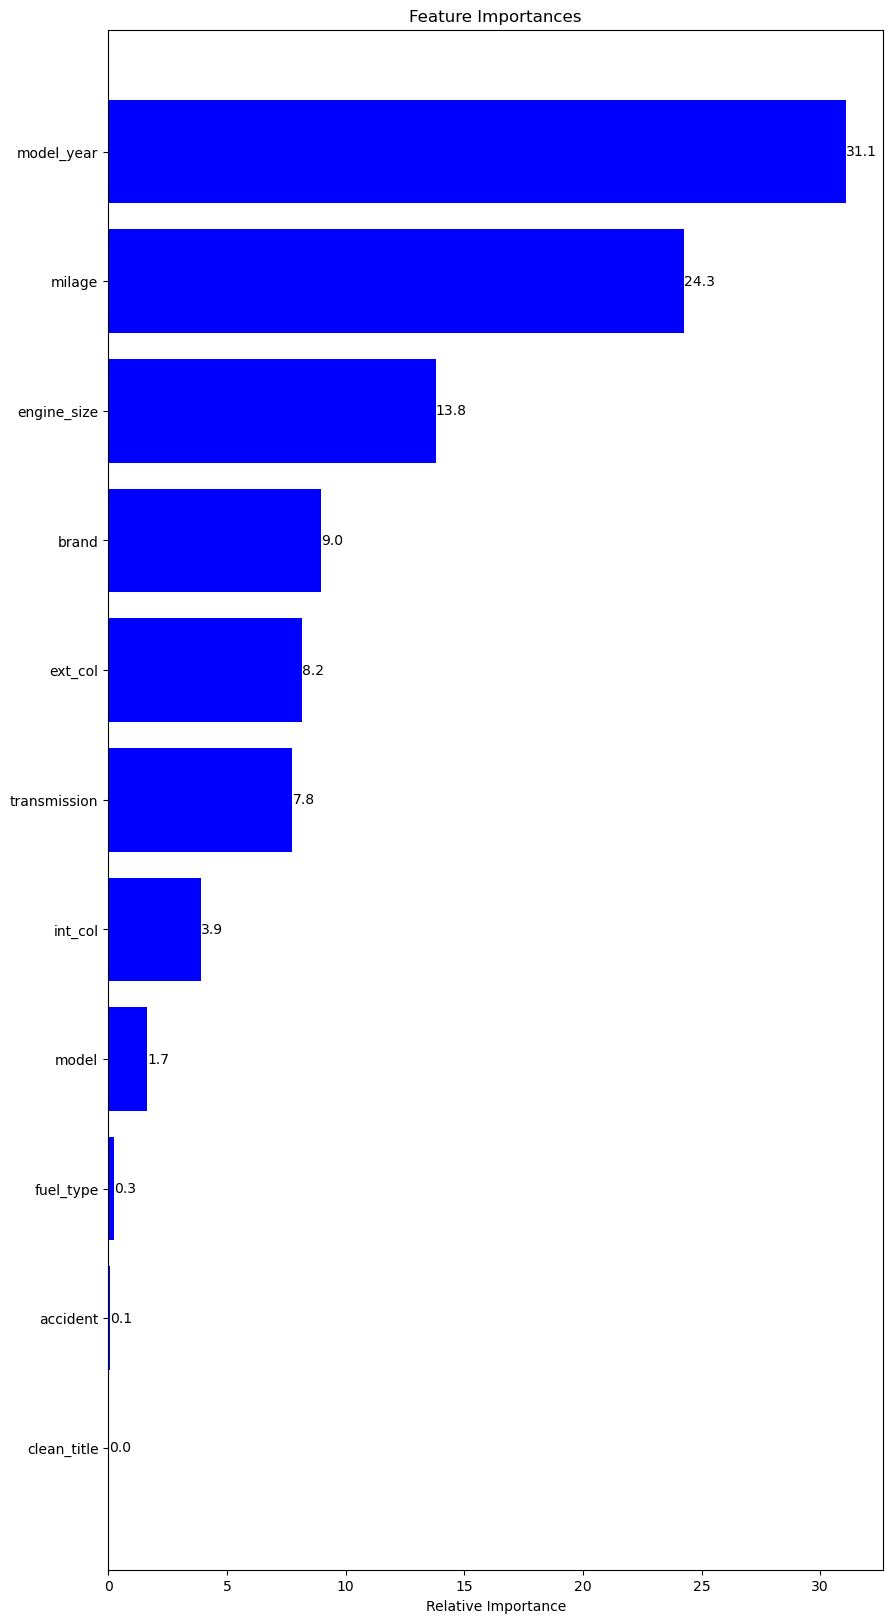

In [162]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

rfr = modeler(RandomForestRegressor, 'RandomForestRegressor', X,y)

features = [i.split("__")[0] for i in X.columns]
importances = rfr[-1].feature_importances_ * 100
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
bars = ax.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.bar_label(bars,fmt='%.1f')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [172]:
import lightgbm 
params = {"boosting_type": "gbdt", "objective": "regression", "metric": "mae", "early_stopping_rounds":100,
          "learning_rate": 0.1, "num_leaves": 16, "n_estimators": 100000, "random_state": 0, "importance_type": "gain"}
lgb = lightgbm.LGBMRegressor(**params)
lgb.fit(X,y,eval_set=[(X_train, y_train), (X_test, y_test)],categorical_feature=cat_cols)
y_pred = lgb.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)

print(MAE)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 3962, number of used features: 11
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Start training from score 44668.645886
Training until

In [175]:
lgb.feature_importances_

array([1.91249881e+13, 1.62312334e+11, 3.07266931e+13, 4.33539362e+13,
       7.79347239e+10, 2.72091550e+13, 2.01998250e+12, 1.45948371e+12,
       4.72236113e+11, 2.59194102e+12, 1.33754571e+11])

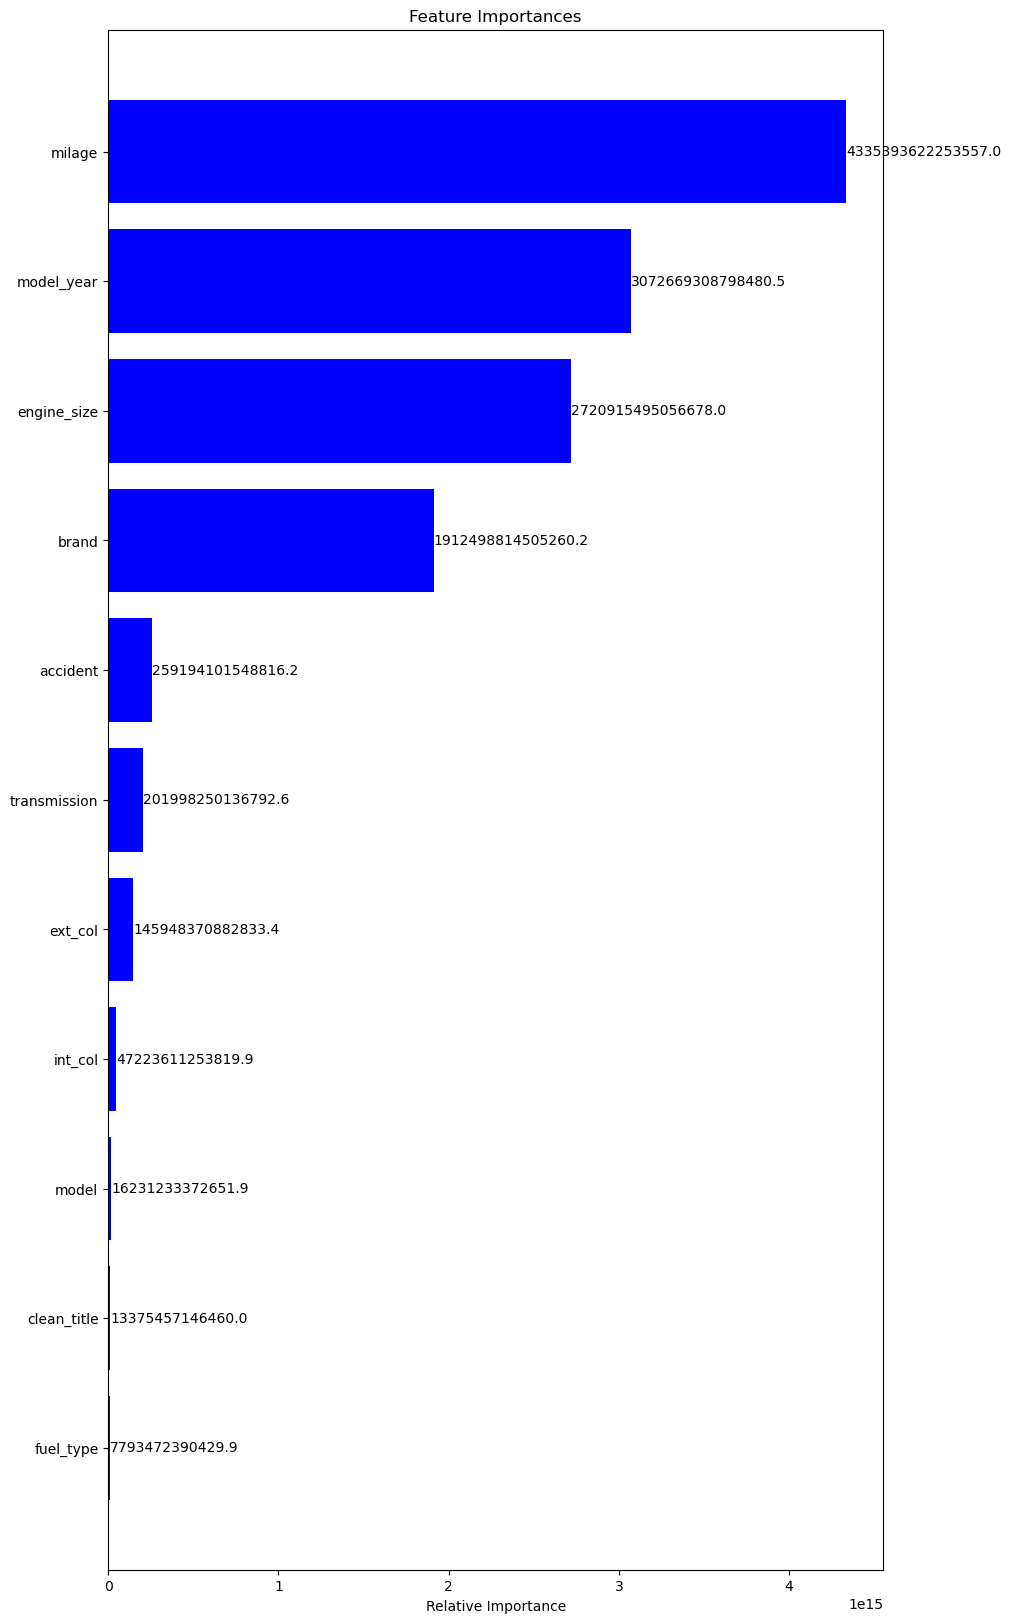

In [176]:
features = [i.split("__")[0] for i in X.columns]
importances = lgb.feature_importances_ * 100
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
bars = ax.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.bar_label(bars,fmt='%.1f')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()